In [2]:
import pandas as pd
from io import StringIO
csv_data = \
'''
A,B,C,D
1.0,2.0,3.0,4.0
6.0,6.0,,8.0
10.0,11.0,12.0,
'''
df = pd.read_csv(StringIO(csv_data))

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,6.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [4]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 6.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [5]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,6.0,6.0
2,10.0,11.0


In [6]:
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,6.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [7]:
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [8]:
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [9]:
from sklearn.impute import SimpleImputer
import numpy as np
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)


In [10]:
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 6. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [11]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,6.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [12]:
import pandas as pd
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']
])

In [13]:
df.columns = ['color', 'size', 'price', 'classlabel']

In [14]:
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [15]:
size_mapping = {
    'XL': 3,
    'L': 2,
    'M': 1
}

In [16]:
df['size'] = df['size'].map(size_mapping)


In [17]:
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [18]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}

In [19]:
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [20]:
import numpy as np
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}

In [21]:
class_mapping

{'class1': 0, 'class2': 1}

In [22]:
df['classlabel'] = df['classlabel'].map(class_mapping)


In [23]:
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [29]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)

In [30]:
df

,color,size,price,classlabel
0,green,1,10.1,NaN
1,red,2,13.5,NaN
2,blue,3,15.3,NaN


In [38]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)

In [40]:
y

array([0, 0, 0])

In [39]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])


In [41]:
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [44]:
from sklearn.preprocessing import OneHotEncoder
X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [45]:
from sklearn.compose import ColumnTransformer
X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([
    ('onehot', OneHotEncoder(), [0]),
    ('nothing', 'passthrough', [1, 2])
])

In [46]:
c_transf.fit_trрansform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [49]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [50]:
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [51]:
color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([
    ('onehot', OneHotEncoder(), [0]),
    ('nothing', 'passthrough', [1, 2])
])

In [52]:
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [54]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
'machine-learning-databases/wine/wine.data',
header=None)

In [55]:
df_wine.columns = ['Метка класса', 'Алкоголь', 'Яблочная кислота',
                  'Зола', 'Щелочность золы', 'Магний', 'Всего фенолов', 
                   'Флавоноиды', 'Нефлавоноидные фенолы', 
                   'Проантоцианиды','Интенсивность цвета', 'Оттенок', 
                   'OD280/OD315 разбавленных вин','Пролин']

In [56]:
print('Метки классов', np.unique(df_wine['Метка класса']))

Метки классов [1 2 3]


In [57]:
df_wine.head()

,Метка класса,Алкоголь,Яблочная кислота,Зола,Щелочность золы,Магний,Всего фенолов,Флавоноиды,Нефлавоноидные фенолы,Проантоцианиды,Интенсивность цвета,Оттенок,OD280/OD315 разбавленных вин,Пролин
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [58]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0,
                                                   stratify=y)

In [59]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [60]:
ex = np.array([0,1, 2, 3, 4, 5])
print('Стандартизированные значения:', (ex - ex.mean()) / ex.std())

Стандартизированные значения: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]


In [61]:
print('Нормализованные значения: ', (ex - ex.min()) / (ex.max() - ex.min()))

Нормализованные значения:  [0.  0.2 0.4 0.6 0.8 1. ]


In [64]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=1.0, 
                        solver='liblinear', multi_class='ovr')
lr.fit(X_train_norm, y_train)
print('Правильность при обучении: ', lr.score(X_train_norm, y_train))
print('Правильность при испытании: ', lr.score(X_test_norm, y_test))

Правильность при обучении:  0.9758064516129032
Правильность при испытании:  0.9814814814814815


In [65]:
lr.intercept_

array([-4.53462684,  1.47560939,  0.        ])

In [66]:
lr.coef_

array([[ 1.54818692,  0.        ,  0.        , -2.1866775 ,  0.        ,
         0.        ,  3.49709101,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  7.38572419],
       [-4.1721562 ,  0.        , -0.20747594,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -2.99575871,
         3.61430279,  1.47748985, -5.73954315],
       [ 0.        ,  1.96742716,  0.        ,  0.        ,  0.        ,
         0.        , -5.67706535,  0.        ,  0.        ,  4.09066196,
         0.        , -3.87885889,  0.        ]])

TypeError: only integer scalar arrays can be converted to a scalar index

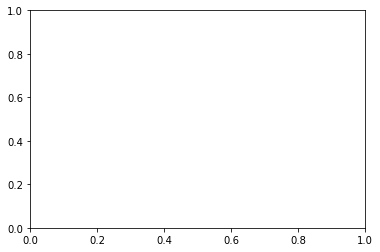

In [70]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot()

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 
          'black', 'pink', 'lightgreen', 'lightblue', 'gray',
         'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c,
                           solver='liblinear', multi_class='ovr',
                           random_state=0)
    lr.fit(X_train_norm, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
            label-df_wine.columns[column + 1],
            color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('весовой коэффициент')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
         bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

In [92]:
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

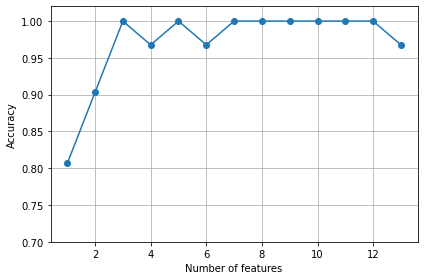

In [95]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_norm, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [96]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Алкоголь', 'Яблочная кислота', 'OD280/OD315 разбавленных вин'], dtype='object')


In [100]:
knn.fit(X_train_norm, y_train)
print('Training accuracy:', knn.score(X_train_norm, y_train))
print('Test accuracy:', knn.score(X_test_norm, y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629


In [101]:
knn.fit(X_train_norm[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_norm[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_norm[:, k3], y_test))

Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


 1 Пролин                         0.185453
 2 Флавоноиды                     0.174751
 3 Интенсивность цвета            0.143920
 4 OD280/OD315 разбавленных вин   0.136162
 5 Алкоголь                       0.118529
 6 Оттенок                        0.058739
 7 Всего фенолов                  0.050872
 8 Магний                         0.031357
 9 Яблочная кислота               0.025648
10 Проантоцианиды                 0.025570
11 Щелочность золы                0.022366
12 Нефлавоноидные фенолы          0.013354
13 Зола                           0.013279


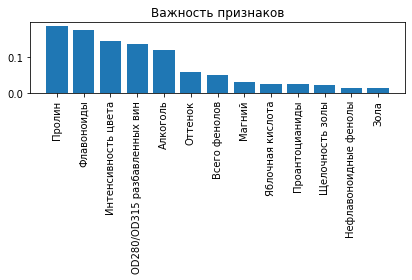

In [107]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d %-*s %f" % (f + 1, 30, feet_labels[indices[f]],
                                                 importances[indices[f]]))
plt.title('Важность признаков')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       align='center')
plt.xticks(range(X_train.shape[1]),
          feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [109]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Количество признаков, удовлетворяющих данному критерию порога',
     X_selected.shape[1])
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]],
                                                  importances[indices[f]]))
    

Количество признаков, удовлетворяющих данному критерию порога 5
 1) Пролин                         0.185453
 2) Флавоноиды                     0.174751
 3) Интенсивность цвета            0.143920
 4) OD280/OD315 разбавленных вин   0.136162
 5) Алкоголь                       0.118529
